In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv('House Pricing.csv')
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Estadísticas básicas:
             count           mean           std      min       25%       50%  \
SalePrice  1460.0  180921.195890  79442.502883  34900.0  129975.0  163000.0   
GrLivArea  1460.0    1515.463699    525.480383    334.0    1129.5    1464.0   
2ndFlrSF   1460.0     346.992466    436.528436      0.0       0.0       0.0   

                 75%       max  
SalePrice  214000.00  755000.0  
GrLivArea    1776.75    5642.0  
2ndFlrSF      728.00    2065.0  


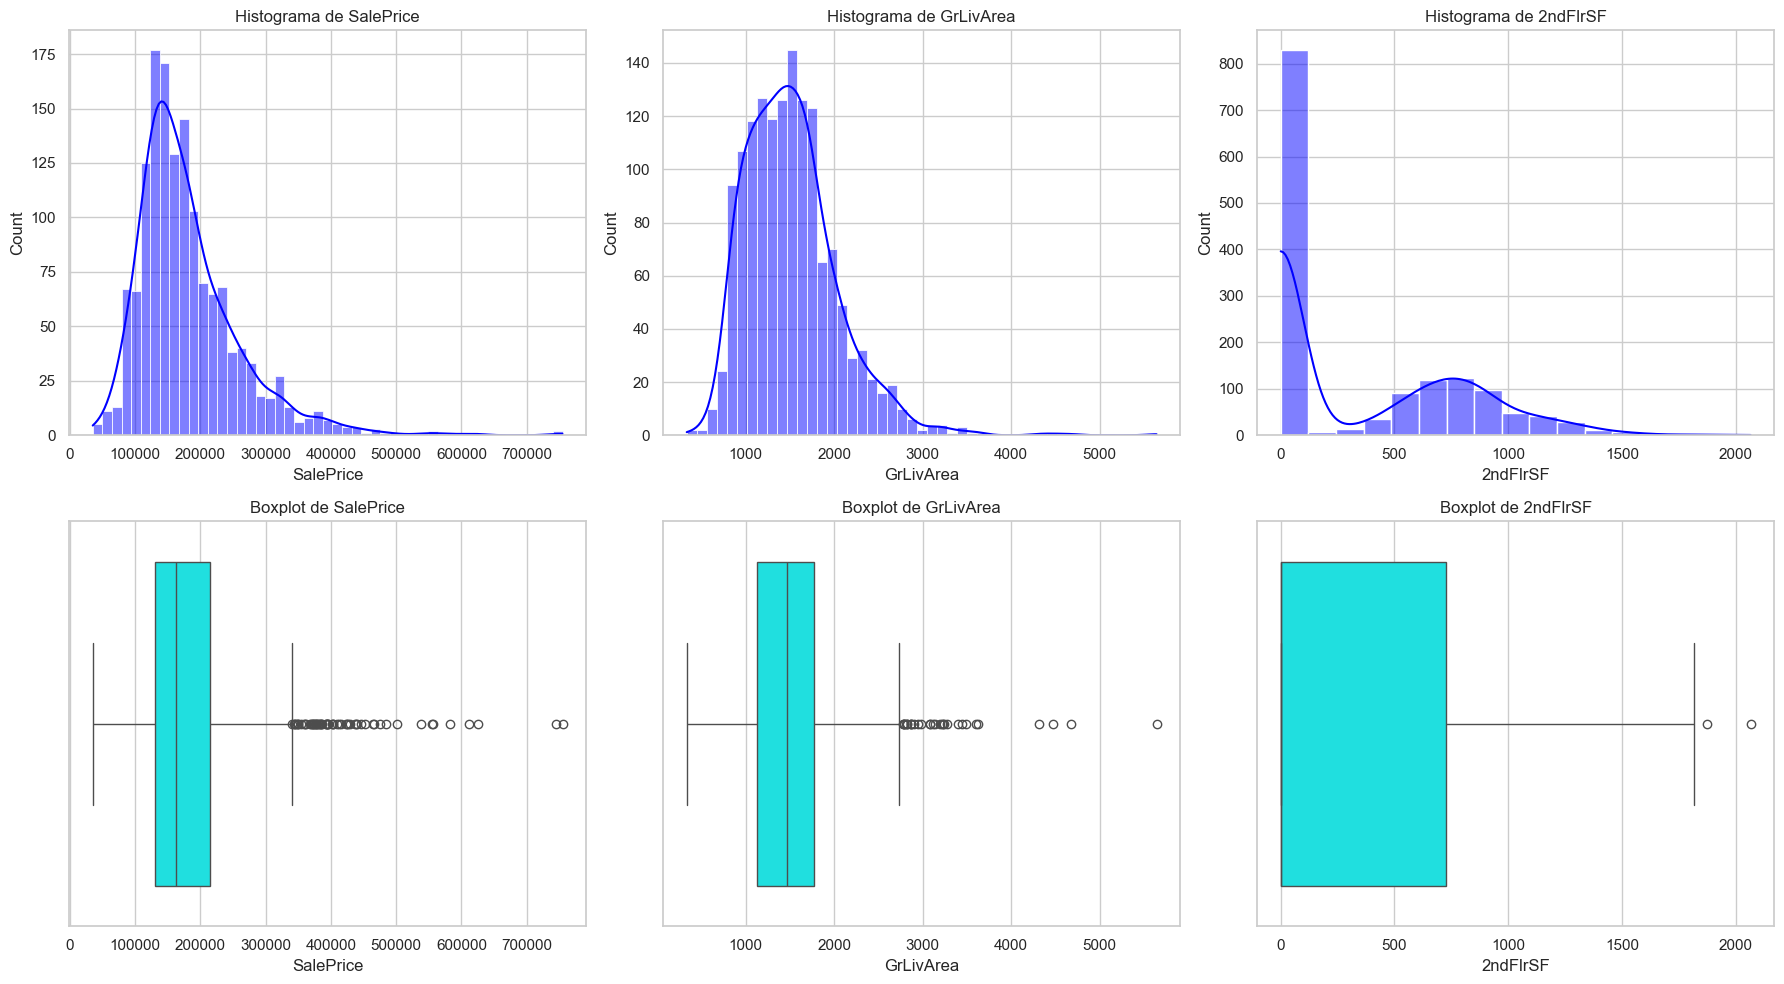

In [3]:
# Selección de las variables numéricas clave
variables_numericas = ['SalePrice', 'GrLivArea', '2ndFlrSF']

# Estadísticas básicas
estadisticas = data[variables_numericas].describe().transpose()
print("Estadísticas básicas:\n", estadisticas)

# Visualización de distribuciones
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, var in enumerate(variables_numericas):
    sns.histplot(data[var], kde=True, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'Histograma de {var}')
    axes[0, i].set_xlabel(var)
    
    sns.boxplot(x=data[var], ax=axes[1, i], color='cyan')
    axes[1, i].set_title(f'Boxplot de {var}')
    axes[1, i].set_xlabel(var)
plt.tight_layout()
plt.show()

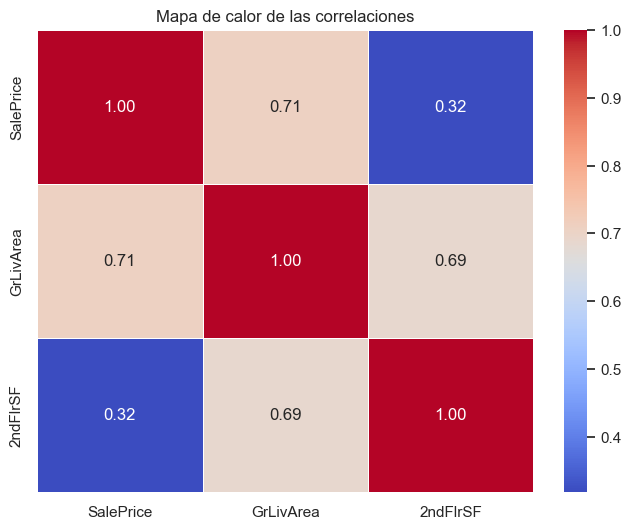

Correlaciones:
            SalePrice  GrLivArea  2ndFlrSF
SalePrice   1.000000   0.708624  0.319334
GrLivArea   0.708624   1.000000  0.687501
2ndFlrSF    0.319334   0.687501  1.000000


In [7]:
# Matriz de correlación y heatmap
correlaciones = data[variables_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de las correlaciones')
plt.show()
print("Correlaciones:\n", correlaciones)


In [17]:
# Selección de variables independientes y dependientes
X = data.select_dtypes(include=['float64', 'int64']).drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Eliminar filas con valores faltantes en ambas variables
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop(['SalePrice'], axis=1)
y = combined['SalePrice']

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión OLS
modelo_ols = sm.OLS(y, X).fit()
print(modelo_ols.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 05 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:08:57   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05    1.7e+06     -0.197

In [13]:
# Multicolinealidad: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
          Variable           VIF
0           const  2.396251e+06
1              Id  1.034686e+00
2      MSSubClass  1.718790e+00
3     LotFrontage  1.827885e+00
4         LotArea  1.356288e+00
5     OverallQual  3.461493e+00
6     OverallCond  1.765745e+00
7       YearBuilt  6.094850e+00
8    YearRemodAdd  2.747160e+00
9      MasVnrArea  1.464423e+00
10     BsmtFinSF1           inf
11     BsmtFinSF2           inf
12      BsmtUnfSF           inf
13    TotalBsmtSF           inf
14       1stFlrSF           inf
15       2ndFlrSF           inf
16   LowQualFinSF           inf
17      GrLivArea           inf
18   BsmtFullBath  2.219913e+00
19   BsmtHalfBath  1.151092e+00
20       FullBath  3.120675e+00
21       HalfBath  2.269333e+00
22   BedroomAbvGr  2.288685e+00
23   KitchenAbvGr  1.593948e+00
24   TotRmsAbvGrd  4.631822e+00
25     Fireplaces  1.585157e+00
26    GarageYrBlt  4.572723e+00
27     GarageCars  4.314005e+00
28     GarageArea  4.448564e+00
29    

C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [19]:
# Construcción del modelo final 
# Aquí puedes decidir qué variables eliminar basándote en el análisis anterior.
variables_finales = [var for var in X.columns if var not in ['const', 'GrLivArea']]  # Ejemplo
X_final = X[variables_finales]
modelo_final = sm.OLS(y, X_final).fit()

# Reporte del modelo final
print(modelo_final.summary())

# Evaluación del modelo final
predicciones = modelo_final.predict(X_final)
mse = mean_squared_error(y, predicciones)
r2 = r2_score(y, predicciones)
print(f"Error cuadrático medio: {mse:.2f}")
print(f"R cuadrada: {r2:.2f}")

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              946.5
Date:                Sun, 05 Jan 2025   Prob (F-statistic):                        0.00
Time:                        20:09:46   Log-Likelihood:                         -13358.
No. Observations:                1121   AIC:                                  2.679e+04
Df Residuals:                    1086   BIC:                                  2.696e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Conclusiones

* Este análisis permitió identificar los factores más relevantes que influyen en el precio de venta de las propiedades, evaluando su distribución, relaciones internas y su impacto en un modelo de regresión.
 
* El precio de venta 'SalePrice' tiene una distribución sesgada hacia la derecha, indicando que la mayoría de las casas tienen precios relativamente bajos con algunas excepciones de alto valor.
 
* El área habitable 'GrLivArea' y el área del segundo piso '2ndFlrSF' también mostraron patrones esperados, con outliers en el extremo superior que representan propiedades inusualmente grandes.

* El análisis destacó que el tamaño del área habitable es el principal motor del precio de venta. Sin embargo, un modelo más completo, que incluya características categóricas y ajuste para sesgos, podría proporcionar un nivel de precisión aún mayor. Este estudio es un excelente punto de partida para entender y predecir el comportamiento del mercado inmobiliario.
